<a href="https://colab.research.google.com/github/NaufalPratomo/PCVK_Ganjil_2025/blob/main/Modul6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

**mengimpor library**

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import os
if not os.path.exists('gambar1.tiff') or not os.path.exists('gambar1.tiff'):
    print("eror")

**Tugas 3: Membuat Histogram Citra Secara Manual**

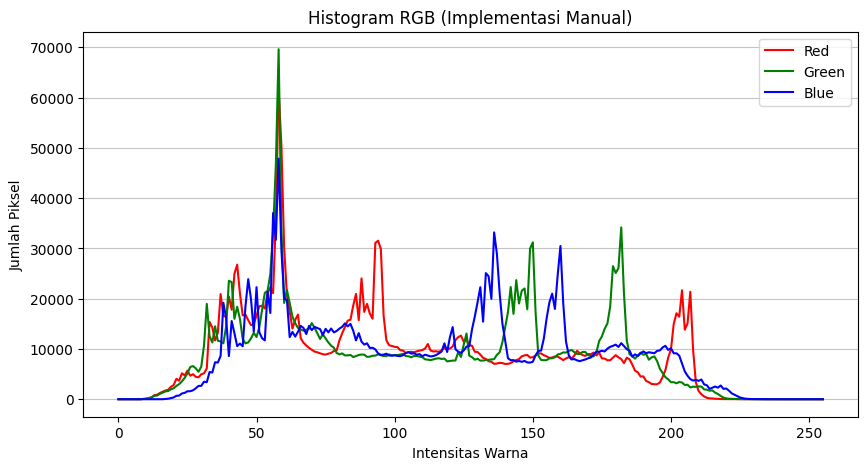

In [4]:
# Membaca gambar dan konversi ke RGB
img = cv2.imread('gambar1.tiff')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Inisialisasi array histogram untuk R, G, B dengan nilai nol
hist_r = np.zeros(256)
hist_g = np.zeros(256)
hist_b = np.zeros(256)
height, width, _ = img_rgb.shape

# Looping piksel demi piksel untuk menghitung frekuensi
for y in range(height):
    for x in range(width):
        r, g, b = img_rgb[y, x]
        hist_r[r] += 1
        hist_g[g] += 1
        hist_b[b] += 1

# Menampilkan histogram
plt.figure(figsize=(10, 5))
plt.title("Histogram RGB (Implementasi Manual)")
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Piksel")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

**Tugas 4: Membuat Histogram dengan Library NumPy**

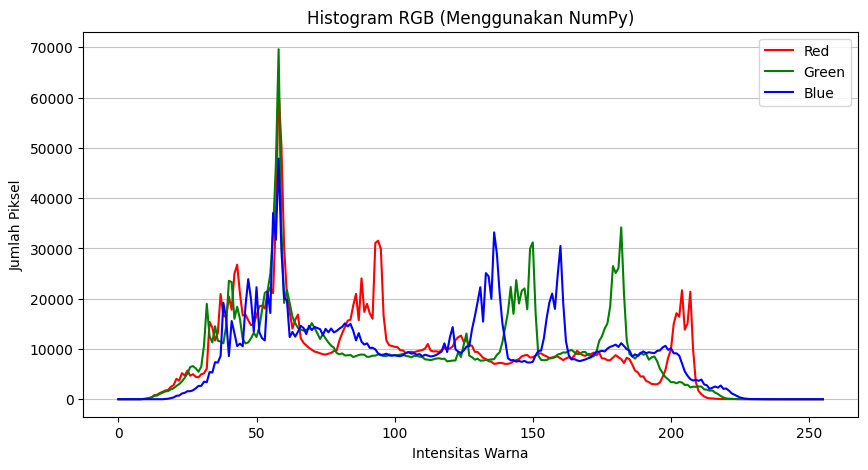

In [7]:
# Membaca gambar dan konversi ke RGB
img = cv2.imread('gambar1.tiff')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Memisahkan channel R, G, B
r_channel = img_rgb[:,:,0]
g_channel = img_rgb[:,:,1]
b_channel = img_rgb[:,:,2]

# Menghitung histogram menggunakan NumPy
# .ravel() mengubah array 2D menjadi 1D
hist_r_np, _ = np.histogram(r_channel.ravel(), bins=256, range=[0,256])
hist_g_np, _ = np.histogram(g_channel.ravel(), bins=256, range=[0,256])
hist_b_np, _ = np.histogram(b_channel.ravel(), bins=256, range=[0,256])

# Menampilkan histogram
plt.figure(figsize=(10, 5))
plt.title("Histogram RGB (Menggunakan NumPy)")
plt.plot(hist_r_np, color='red', label='Red')
plt.plot(hist_g_np, color='green', label='Green')
plt.plot(hist_b_np, color='blue', label='Blue')
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Piksel")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

**Tugas 5: Histogram Equalization Secara Manual**

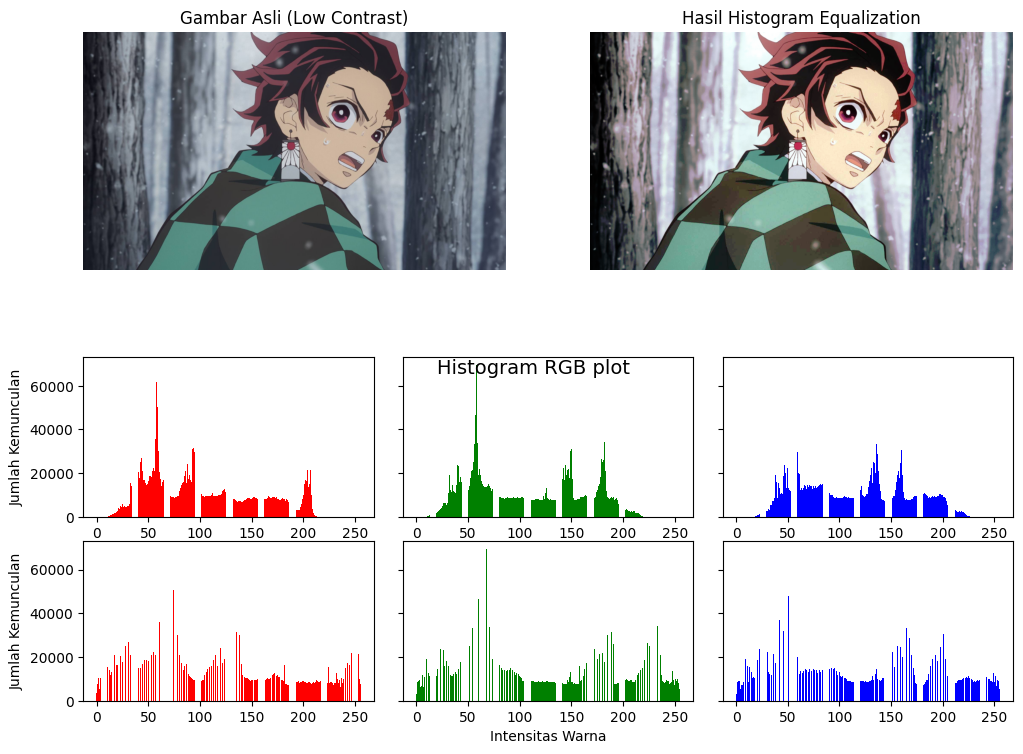

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys

# Membaca gambar low-contrast dalam format warna
try:
    img_lc = cv2.imread('gambar1.tiff')
    if img_lc is None:
        raise FileNotFoundError
    # Konversi dari BGR (standar OpenCV) ke RGB
    img_lc_rgb = cv2.cvtColor(img_lc, cv2.COLOR_BGR2RGB)
except FileNotFoundError:
    print("Error")
    sys.exit()

# Pisahkan channel R, G, B dari gambar asli
r_asli, g_asli, b_asli = cv2.split(img_lc_rgb)

# Terapkan Histogram Equalization pada setiap channel
r_eq = cv2.equalizeHist(r_asli)
g_eq = cv2.equalizeHist(g_asli)
b_eq = cv2.equalizeHist(b_asli)

# Gabungkan kembali channel yang sudah di-equalize
img_he = cv2.merge((r_eq, g_eq, b_eq))




# 1. Membuat Figure utama dan Grid utama
fig = plt.figure(figsize=(12, 9))
gs_main = gridspec.GridSpec(2, 1, figure=fig, height_ratios=[1, 1.2])

# 2. Membuat Sub-Grid dan plot untuk gambar di baris pertama
gs_images = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs_main[0])
ax_img1 = fig.add_subplot(gs_images[0, 0])
ax_img1.imshow(img_lc_rgb)
ax_img1.set_title("Gambar Asli (Low Contrast)")
ax_img1.axis('off')

ax_img2 = fig.add_subplot(gs_images[0, 1])
ax_img2.imshow(img_he)
ax_img2.set_title("Hasil Histogram Equalization")
ax_img2.axis('off')

# 3. Membuat Sub-Grid untuk 6 histogram di baris kedua
gs_hists = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=gs_main[1], hspace=0.15, wspace=0.1)

# Definisikan axes untuk setiap plot histogram
ax_r1 = fig.add_subplot(gs_hists[0, 0])
ax_g1 = fig.add_subplot(gs_hists[0, 1], sharey=ax_r1)
ax_b1 = fig.add_subplot(gs_hists[0, 2], sharey=ax_r1)
ax_r2 = fig.add_subplot(gs_hists[1, 0], sharex=ax_r1)
ax_g2 = fig.add_subplot(gs_hists[1, 1], sharex=ax_g1, sharey=ax_r2)
ax_b2 = fig.add_subplot(gs_hists[1, 2], sharex=ax_b1, sharey=ax_r2)

# Sembunyikan label tick yang tidak perlu
plt.setp(ax_g1.get_yticklabels(), visible=False)
plt.setp(ax_b1.get_yticklabels(), visible=False)
plt.setp(ax_g2.get_yticklabels(), visible=False)
plt.setp(ax_b2.get_yticklabels(), visible=False)

# Kumpulan axes untuk looping
axes_asli = [ax_r1, ax_g1, ax_b1]
axes_eq = [ax_r2, ax_g2, ax_b2]
channels_asli = (r_asli, g_asli, b_asli)
channels_eq = (r_eq, g_eq, b_eq)
colors = ('red', 'green', 'blue')

# Plot histogram SEBELUM equalization
for ax, channel, color in zip(axes_asli, channels_asli, colors):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    ax.bar(range(256), hist.ravel(), color=color)

# Plot histogram SESUDAH equalization
for ax, channel, color in zip(axes_eq, channels_eq, colors):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    ax.bar(range(256), hist.ravel(), color=color)

# Atur label hanya di tempat yang diperlukan
ax_r1.set_ylabel("Jumlah Kemunculan")
ax_r2.set_ylabel("Jumlah Kemunculan")
ax_g2.set_xlabel("Intensitas Warna") # Label X di tengah bawah

# Tambahkan judul utama untuk blok histogram
fig.text(0.5, 0.48, 'Histogram RGB plot', ha='center', va='center', fontsize=14)

plt.show()

**Tugas 6: Histogram Equalization dengan Library CV2**

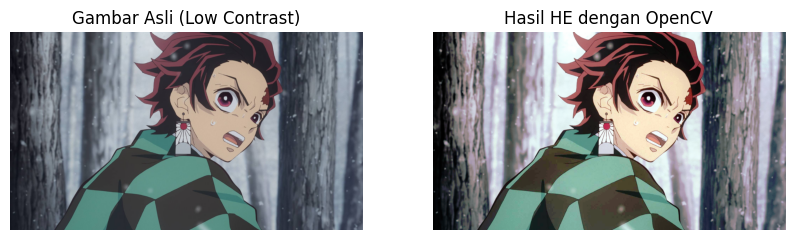

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

# Membaca gambar low-contrast dalam format warna
try:
    img_lc = cv2.imread('gambar1.tiff')
    if img_lc is None:
        raise FileNotFoundError
    img_lc_rgb = cv2.cvtColor(img_lc, cv2.COLOR_BGR2RGB)
except FileNotFoundError:
    print("Error")
    sys.exit()

# Pisahkan channel B, G, R (urutan standar OpenCV)
b, g, r = cv2.split(img_lc)

# Terapkan equalizeHist pada setiap channel
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# Gabungkan kembali channel yang sudah di-equalize
img_he_cv = cv2.merge((b_eq, g_eq, r_eq))
img_he_cv_rgb = cv2.cvtColor(img_he_cv, cv2.COLOR_BGR2RGB)

# Tampilkan perbandingan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_lc_rgb)
plt.title("Gambar Asli (Low Contrast)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_he_cv_rgb)
plt.title("Hasil HE dengan OpenCV")
plt.axis('off')
plt.show()


**Tugas 7: Pemetaan Warna ke 8 Warna Dasar (Kuantisasi)**

Memulai proses kuantisasi warna
Proses selesai.


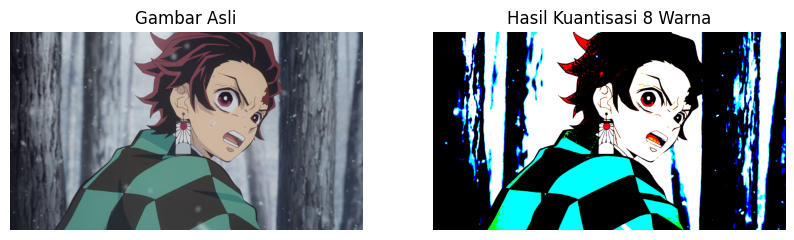

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys


# Membaca gambar asli dan konversi ke RGB
try:
    img = cv2.imread('gambar1.tiff')
    if img is None:
        raise FileNotFoundError
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
except FileNotFoundError:
    print("Error")
    sys.exit()

# Definisikan palet 8 warna dalam format RGB
palette = np.array([
    [0, 0, 0],       # Hitam
    [0, 255, 0],     # Hijau
    [255, 255, 0],   # Kuning
    [0, 0, 255],     # Biru
    [0, 255, 255],   # Cyan
    [255, 0, 255],   # Magenta
    [255, 255, 255], # Putih
    [255, 0, 0]      # Merah (sesuai contoh output, bukan hijau)
], dtype=np.uint8)

# Buat gambar baru untuk hasil kuantisasi
img_quantized = np.zeros_like(img_rgb)
height, width, _ = img_rgb.shape

print("Memulai proses kuantisasi warna")
# Iterasi setiap piksel dan cari warna terdekat
for y in range(height):
    for x in range(width):
        pixel = img_rgb[y, x]
        # Hitung jarak Euklides kuadrat ke setiap warna di palet
        distances = np.sum((palette.astype(np.float32) - pixel)**2, axis=1)
        # Temukan indeks warna dengan jarak terkecil
        nearest_color_index = np.argmin(distances)
        # Tetapkan warna terdekat ke piksel gambar baru
        img_quantized[y, x] = palette[nearest_color_index]

print("Proses selesai.")

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_quantized)
plt.title("Hasil Kuantisasi 8 Warna")
plt.axis('off')
plt.show()

**Tugas 8 : Dithering Floyd-Steinberg**

Memulai proses dithering
Proses dithering selesai.


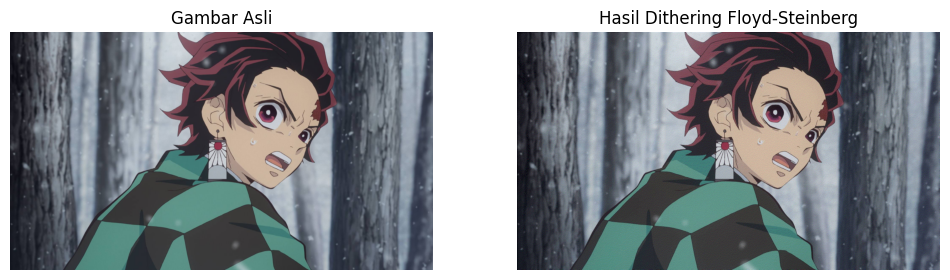

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

# Membaca gambar asli dan konversi ke RGB
try:
    img = cv2.imread('gambar1.tiff')
    if img is None:
        raise FileNotFoundError
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
except FileNotFoundError:
    print("Error")
    sys.exit()

# Definisikan palet 8 warna yang sama dari tugas sebelumnya
palette = np.array([
    [0, 0, 0], [255, 255, 255], [255, 0, 0], [0, 255, 0],
    [0, 0, 255], [255, 255, 0], [0, 255, 255], [255, 0, 255]
], dtype=np.uint8)

# Buat salinan gambar dan ubah tipe datanya ke float untuk perhitungan error
img_dither = img_rgb.astype(np.float32)
height, width, _ = img_dither.shape

print("Memulai proses dithering")
# Implementasi Dithering Floyd-Steinberg
for y in range(height):
    for x in range(width):
        old_pixel = img_dither[y, x].copy()

        # Cari warna terdekat dari palet
        distances = np.sum((palette.astype(np.float32) - old_pixel)**2, axis=1)
        nearest_color_index = np.argmin(distances)
        new_pixel = palette[nearest_color_index].astype(np.float32)

        # Set piksel baru
        img_dither[y, x] = new_pixel

        # Hitung error kuantisasi
        quant_error = old_pixel - new_pixel

        # Distribusikan error ke piksel tetangga sesuai kernel Floyd-Steinberg
        if x + 1 < width:
            img_dither[y, x + 1] += quant_error * 7 / 16
        if x - 1 >= 0 and y + 1 < height:
            img_dither[y + 1, x - 1] += quant_error * 3 / 16
        if y + 1 < height:
            img_dither[y + 1, x] += quant_error * 5 / 16
        if x + 1 < width and y + 1 < height:
            img_dither[y + 1, x + 1] += quant_error * 1 / 16

print("Proses dithering selesai.")

# Konversi kembali ke uint8 (0-255) dan tampilkan
img_dither_final = np.clip(img_dither, 0, 255).astype(np.uint8)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_dither_final)
plt.title("Hasil Dithering Floyd-Steinberg")
plt.axis('off')
plt.show()

**TUGAS 9: GRAYSCALE -> HE -> DITHERING (DENGAN HISTOGRAM)**

Memulai proses dithering untuk gambar grayscale
Proses dithering selesai.


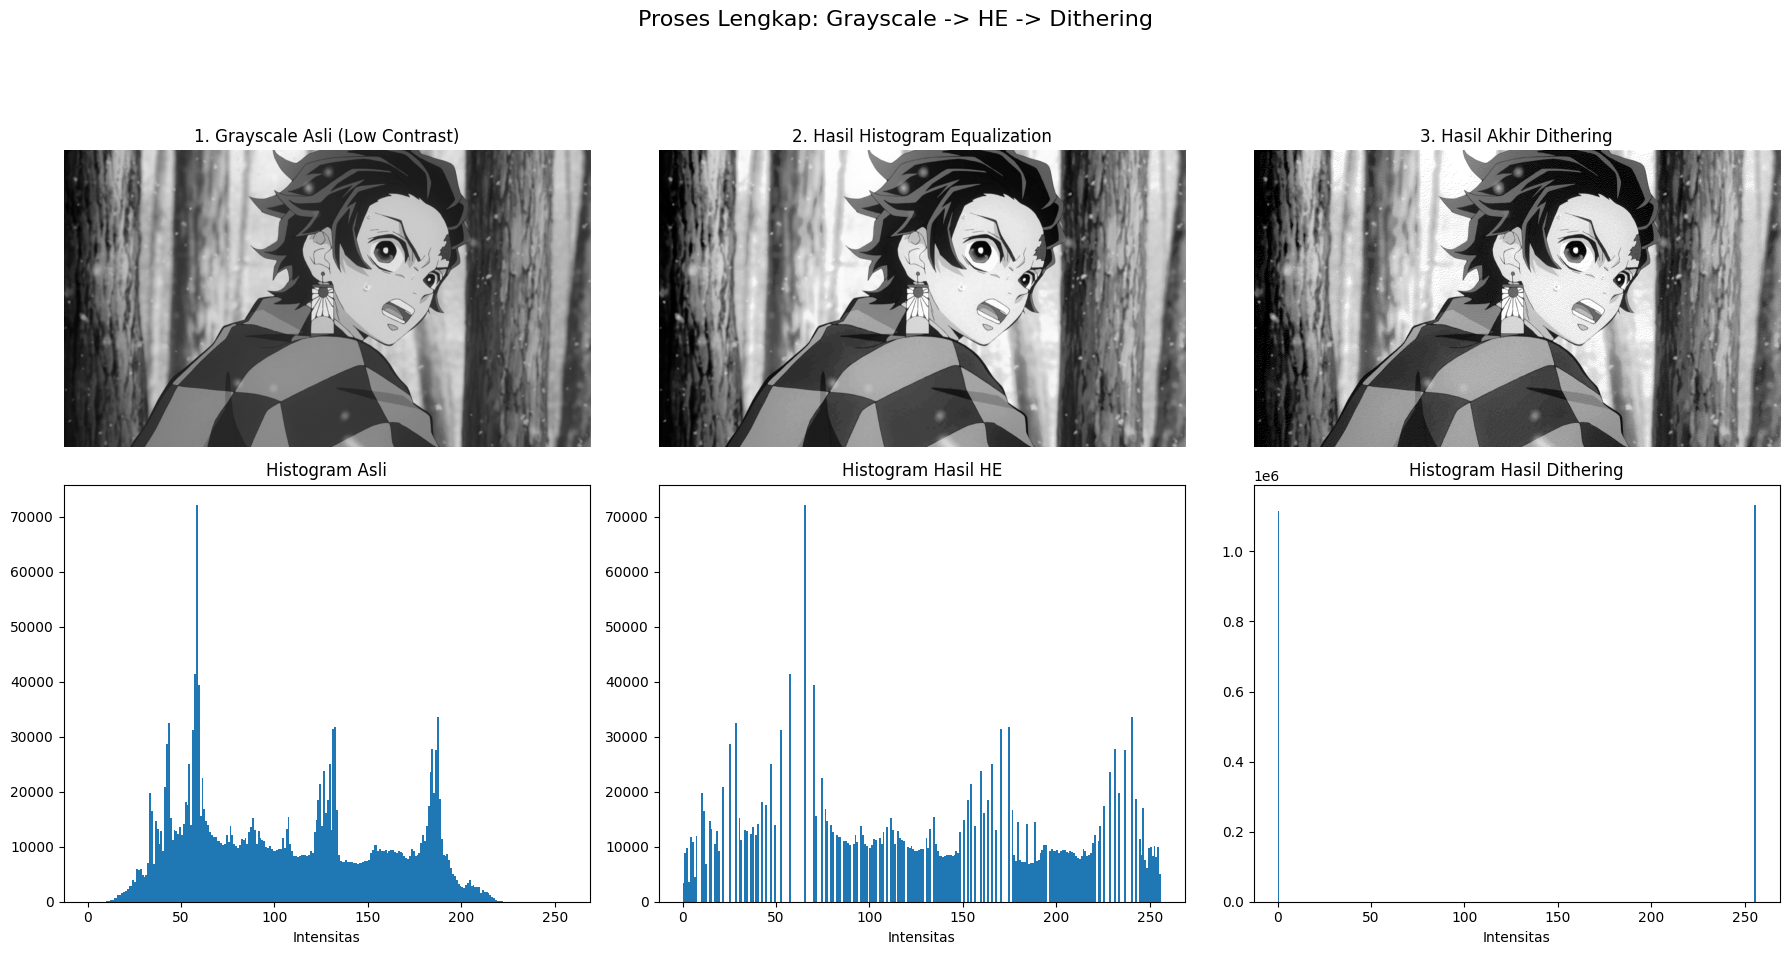

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

# Baca gambar low-contrast dan ubah ke grayscale
try:
    img_lc = cv2.imread('gambar1.tiff')
    if img_lc is None:
        raise FileNotFoundError
    gray_img = cv2.cvtColor(img_lc, cv2.COLOR_BGR2GRAY)
except FileNotFoundError:
    print("Error")
    sys.exit()

# Terapkan Histogram Equalization
he_gray_img = cv2.equalizeHist(gray_img)

# Buat salinan gambar hasil HE untuk proses dithering
dither_img = he_gray_img.astype(np.float32)
height, width = dither_img.shape

print("Memulai proses dithering untuk gambar grayscale")
# Implementasi Dithering Floyd-Steinberg (Hitam-Putih)
for y in range(height):
    for x in range(width):
        old_pixel = dither_img[y, x]
        new_pixel = 255 if old_pixel > 127 else 0 # Kuantisasi ke hitam/putih
        dither_img[y, x] = new_pixel

        quant_error = old_pixel - new_pixel

        # Distribusikan error ke piksel tetangga
        if x + 1 < width:
            dither_img[y, x + 1] += quant_error * 7 / 16
        if x - 1 >= 0 and y + 1 < height:
            dither_img[y + 1, x - 1] += quant_error * 3 / 16
        if y + 1 < height:
            dither_img[y + 1, x] += quant_error * 5 / 16
        if x + 1 < width and y + 1 < height:
            dither_img[y + 1, x + 1] += quant_error * 1 / 16

print("Proses dithering selesai.")

# Konversi kembali ke uint8 untuk ditampilkan
final_dithered_img = np.clip(dither_img, 0, 255).astype(np.uint8)


# Membuat grid 2x3 untuk 3 gambar di atas dan 3 histogram di bawah
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Proses Lengkap: Grayscale -> HE -> Dithering', fontsize=16)

# Baris 1: Menampilkan Gambar
axes[0, 0].imshow(gray_img, cmap='gray')
axes[0, 0].set_title("1. Grayscale Asli (Low Contrast)")
axes[0, 0].axis('off')

axes[0, 1].imshow(he_gray_img, cmap='gray')
axes[0, 1].set_title("2. Hasil Histogram Equalization")
axes[0, 1].axis('off')

axes[0, 2].imshow(final_dithered_img, cmap='gray')
axes[0, 2].set_title("3. Hasil Akhir Dithering")
axes[0, 2].axis('off')

# Baris 2: Menampilkan Histogram (dengan sintaks baru)
axes[1, 0].hist(gray_img.ravel(), bins=256, range=[0,256])
axes[1, 0].set_title("Histogram Asli")
axes[1, 0].set_xlabel("Intensitas")

axes[1, 1].hist(he_gray_img.ravel(), bins=256, range=[0,256])
axes[1, 1].set_title("Histogram Hasil HE")
axes[1, 1].set_xlabel("Intensitas")

axes[1, 2].hist(final_dithered_img.ravel(), bins=256, range=[0,256])
axes[1, 2].set_title("Histogram Hasil Dithering")
axes[1, 2].set_xlabel("Intensitas")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()